<a href="https://colab.research.google.com/github/codeforever200/Indian_Startup_Funding_Analysis/blob/main/dataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install pygris

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install PyShp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 2.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/final_data.csv"))
df.head()

,Unnamed: 0,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,States
0,0,04/03/2021,DealShare,Ecommerce,Online shopping platform,Jaipur,Innoven Capital,Debt Financing,250000000.0,Rajasthan
1,1,31/03/2021,Uniphore,Technology,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,140000000.0,abroad
2,2,30/03/2021,Dunzo,Ecommerce,Hyper-local delivery app,Bangalore,Krishtal Advisors Pte Ltd,Series E,8000000.0,Karnataka
3,3,30/03/2021,BYJU’S,Edu-Tech,Online tutoring,Bangalore,"MC Global Edtech, B Capital, Baron, others",Series F,460000000.0,Karnataka
4,4,23/03/2021,SkilloVilla,Edu-Tech,Career and job-oriented upskilling.,Bangalore,"Titan Capital, others",Seed / Angel Funding,300000000.0,Karnataka


In [ ]:
print(df.columns)

Index(['Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD',
       'Unnamed: 8'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date dd/mm/yyyy    3173 non-null   object
 1   Startup Name       3173 non-null   object
 2   Industry Vertical  3003 non-null   object
 3   SubVertical        3003 non-null   object
 4   City  Location     3131 non-null   object
 5   Investors Name     3149 non-null   object
 6   InvestmentnType    3166 non-null   object
 7   Amount in USD      2197 non-null   object
 8   Unnamed: 8         419 non-null    object
dtypes: object(9)
memory usage: 223.2+ KB


In [ ]:
df = df.drop(['Unnamed: 8'], axis=1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 3002
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date dd/mm/yyyy    2023 non-null   object 
 1   Startup Name       2023 non-null   object 
 2   Industry Vertical  2023 non-null   object 
 3   SubVertical        2023 non-null   object 
 4   City  Location     2023 non-null   object 
 5   Investors Name     2023 non-null   object 
 6   InvestmentnType    2023 non-null   object 
 7   Amount in USD      2023 non-null   float64
dtypes: float64(1), object(7)
memory usage: 142.2+ KB


Renaming mispelled values

In [ ]:
df['City  Location'] = df['City  Location'].replace(['Bangalore','Bengaluru','Bengaluru and Gurugram'],'Bangalore')
df['City  Location'] = df['City  Location'].replace(['Gurgaon','Gurugram'],'Gurugram')
df['City  Location'] = df['City  Location'].replace(['Ahemadabad','Ahemdabad'],'Ahmedabad')

df['InvestmentnType'] = df['InvestmentnType'].replace(['Seed/ Angel Funding',
                                                       'Seed / Angel Funding',
                                                       'Seed/Angel Funding',
                                                       'Angel / Seed Funding',
                                                       'Seed Funding'],'Seed / Angel Funding')

# removing ',' from Amount in USD

df["Amount in USD"] = df["Amount in USD"].apply(lambda x: str(x).replace(",",""))
df["Amount in USD"] = pd.to_numeric(df["Amount in USD"],errors='coerce')

Renaming industries for better categorisation

In [ ]:
df['Industry Vertical'] = df['Industry Vertical'].replace(['E-Commerce','eCommece','E-comerce','eCommerce','ecommerce','E-commerce','E-commerce','ECommerce','Ecommerce','Retail'],'Ecommerce')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Aerospace','IoT','Tech','Technology','tech','technology','Saas'],'Technology')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Customer Service Platform','Customer service','Customer Service','Consumer Technology','Consumer Service Platform','Conusmer Service','Consumer services','Services','Consumer Goods Company','Consumer Goods','Consumer service','Human Resources'],'Consumer Service')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Food delivery','Hyperlocal Grocery App','Food & Beverages','Healthy Food Online Community','Food','Food Delivery','Online Food Delivery','Food Startup','FoodTech','Food-Tech','Food and Beverage','Food & Beverage','Food Tech'],'Food and Beverages')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Information Technology and Services','SaaS','IOT','IT'],'Information Technology')
df['Industry Vertical'] = df['Industry Vertical'].replace(['social network','Social Network','Consumer Portal','Consumer internet','Social Media','Social Network f','Picture based Social App','Customer Internet','OTT Player'],'Consumer Internet')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Online Homeopathy Clinic','Health and Wellness','Healthcare','HealthTech','Health Care','healthcare'],'Healthcare')
df['Industry Vertical'] = df['Industry Vertical'].replace(['EduTech','Educatio','Ed-Tech','Edtech','Education','Edu-tech','Robotic Program learning','EdTech','Exam Preparation Platform','Ed-tech'],'Edu-Tech')
df['Industry Vertical'] = df['Industry Vertical'].replace(['AgriTech','Agtech','Mobile Commerce for Farmers'],'Agriculture',)
df['Industry Vertical'] = df['Industry Vertical'].replace(['Advertising, Marketing','publishing','Publishing','Media','Advertising','Marketing'],'Advertising,Marketing')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Logistics Services Provider','Logistics','Supply chain','Logistics Tech','Logistics service platform'],'Logistics & Supplychain')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Financial Tech','Fintech','Accounting','Fin-Tech','FinTech','Fiinance'],'Finance')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Automobile','Industrial Tools Marketplace'],'Automotive')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Clean-tech'],'Clean-Tech')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Online Gaming'],'Gaming')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Travel Tech','Transport','Automotive Rental'],'Transportation')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Beauty & Lifestyle Mobile Marketplace','Fashion and Apparel','Health and wellness','Health Tech'],'Lifestyle')
df['Industry Vertical'] = df['Industry Vertical'].replace(['Waste Management Service','Water Purification','Waste Management','Energy','Clean-Tech'],'Environmental Service')
df['InvestmentnType'] = df['InvestmentnType'].replace(['PrivateEquity'],'Private Equity')
df['InvestmentnType'] = df['InvestmentnType'].replace(['Pre-series A','pre-series A'],'Pre-Series A')
df['InvestmentnType'] = df['InvestmentnType'].replace(['Seed','Angel','Angel Round','Seed / Angle Funding'],'Seed / Angel Funding')
df['InvestmentnType'] = df['InvestmentnType'].replace(['Venture - Series Unknown ','Venture-Series Unknown ','Venture'],'Venture Series')
df['InvestmentnType'] = df['InvestmentnType'].replace(['Pre Seed'],'Pre-Seed')

In [ ]:
df['InvestmentnType'].value_counts()

Private Equity                 1002
Seed / Angel Funding            796
Series A                         40
Series B                         29
Series C                         24
Debt Funding                     22
Series D                         15
Pre-Series A                     10
Series F                          8
Seed Round                        7
Venture Series                    7
Series E                          5
Debt Financing                    4
Private Equity Round              4
pre-Series A                      4
Venture - Series Unknown          3
Venture Round                     3
Venture-Series Unknown            2
Series J                          2
In Progress                       2
Equity                            2
Inhouse Funding                   1
Debt-Funding                      1
Debt and Preference capital       1
Corporate Round                   1
Series H                          1
Mezzanine                         1
Series B (Extension)        

In [ ]:
df['Industry Vertical'].value_counts()

Consumer Internet          608
Technology                 341
Ecommerce                  267
Finance                    131
Information Technology     114
Edu-Tech                    85
Food and Beverages          85
Consumer Service            85
Healthcare                  81
Logistics & Supplychain     71
Lifestyle                   45
Transportation              31
Advertising,Marketing       20
Real Estate                 17
Automotive                  12
Environmental Service       10
Gaming                       8
Agriculture                  8
Hospitality                  4
Name: Industry Vertical, dtype: int64

Creating new column with state names corresponding to the cities

In [ ]:
def state(row):
  if row['City  Location'] == 'Bangalore' and 'Kormangala' and 'Udupi' and 'Hubli':
    return 'Karnataka'
  if row['City  Location'] == 'Mumbai' and 'Andheri'and 'Pune' and 'Chembur' and 'Nagpur' and 'Goa':
    return 'Maharashtra'
  if row['City  Location'] == 'Goa' and 'Panaji':
    return 'Goa'
  if row['City  Location'] == 'Gurugram' and 'Faridabad' and 'Chandigarh':
    return 'Haryana'
  if row['City  Location'] == 'Ahmedabad' and 'Surat' and 'Vadodara':
    return 'Gujarat'
  if row['City  Location'] == 'Jaipur' and 'Udaipur' and 'Jodhpur':
    return 'Rajasthan'
  if row['City  Location'] == 'New Delhi':
    return 'Delhi'
  if row['City  Location'] == 'Noida' and 'Lucknow' and 'Kanpur':
    return 'Uttar Pradesh'
  if row['City  Location'] == 'Bhopal' and 'Indore' and 'Gwalior':
    return 'Madhya Pradesh'
  if row['City  Location'] == 'Ranchi':
    return 'Jharkhand'
  if row['City  Location'] == 'Patna':
    return 'Bihar'
  if row['City  Location'] == 'Chennai' and 'Taramani' and 'Coimbatore' and 'Karur':
    return 'Tamil Nadu'
  if row['City  Location'] == 'Amritsar':
    return 'Punjab'
  if row['City  Location'] == 'Hyderabad':
    return 'Telangana'
  if row['City  Location'] == 'Rourkela' and 'Bhubneswar':
    return 'Odisha'
  if row['City  Location'] == 'Srinagar':
    return 'Jammu and Kashmir'
  if row['City  Location'] == 'Kolkata' and 'Siliguri'and 'Darjeeling':
    return 'West Bengal'
  if row['City  Location'] == 'Trivandrum' and 'Kochi' and 'Kozhikode' and 'Kerala':
    return 'Kerala'
  if row['City  Location'] == 'Manali':
    return 'Himachal Pradesh'
  else:
    return 'abroad'

df['States'] = df.apply(lambda row: state(row),axis=1)

In [ ]:
df.head(20)

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,States
0,04/03/2021,DealShare,Ecommerce,Online shopping platform,Jaipur,Innoven Capital,Debt Financing,250000000.0,Rajasthan
1,31/03/2021,Uniphore,Technology,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,140000000.0,abroad
2,30/03/2021,Dunzo,Ecommerce,Hyper-local delivery app,Bangalore,Krishtal Advisors Pte Ltd,Series E,8000000.0,Karnataka
3,30/03/2021,BYJU’S,Edu-Tech,Online tutoring,Bangalore,"MC Global Edtech, B Capital, Baron, others",Series F,460000000.0,Karnataka
4,23/03/2021,SkilloVilla,Edu-Tech,Career and job-oriented upskilling.,Bangalore,"Titan Capital, others",Seed / Angel Funding,300000000.0,Karnataka
5,25/03/2021,CityMall,Ecommerce,Social ecommerce and online grocery platform,Gurugram,Accel Partners,Series A,11000000.0,Haryana
6,26/03/2021,DotPe,Finance,Commerce and payments platform to offline ente...,Gurugram,PayU,Series A,27500000.0,Haryana
7,01/04/2021,BYJU’S,Edu-Tech,Online tutoring,Bangalore,Innoven Capital,Series F,460000000.0,Karnataka
8,05/04/2021,Meesho,Ecommerce,Online reselling platform,Bangalore,SoftBank Vision Fund 2,Series E,300000000.0,Karnataka
9,14/04/2021,Swiggy,Food and Beverages,Online Food Delivery,Bangalore,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,343000000.0,Karnataka


In [ ]:
df['Industry Vertical'] = df['Industry Vertical'].astype(object)


In [ ]:
df['Industry Vertical'].astype()

dtype('O')

In [ ]:
import plotly.express as px
loc= df['InvestmentnType'].value_counts()
#loc2= df['City  Location'].value_counts()
fig = px.bar(df,x=loc.index[:10],y=loc.values[:10],labels={'InvestmentType':'Count'})
fig.show()

Creating Map Visuals

In [ ]:
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')

In [ ]:
fp = '/content/drive/MyDrive/Maps_with_python-master/Maps_with_python-master/india-polygon.shp'
map_df = gpd.read_file(fp)
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


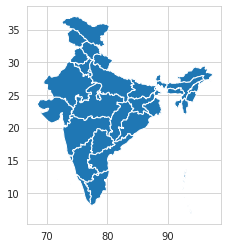

In [ ]:
map_df.plot()

In [ ]:
state_df = df.groupby('location')['Founding Year'].count()
state_df = state_df.to_frame()
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['location', 'count']

In [ ]:
state_df

,location,count
0,Delhi,2
1,Delhi,1
2,Haryana,17
3,Karantaka,1
4,Karnataka,41
5,Karnatka,2
6,Maharashtra,23
7,Mahrashtra,1
8,Rajasthan,2
9,Tamil Nadu,5


In [ ]:
#Merging the data
merged = map_df.set_index('st_nm').join(state_df.set_index('location'))
merged['sum'] = merged['sum'].replace(np.nan, 0)
merged.head()

,id,geometry,sum
st_nm,,,
Andaman and Nicobar Islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",0.0
Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",0.0
Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",0.0
Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",0.0
Chandigarh,None,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",0.0


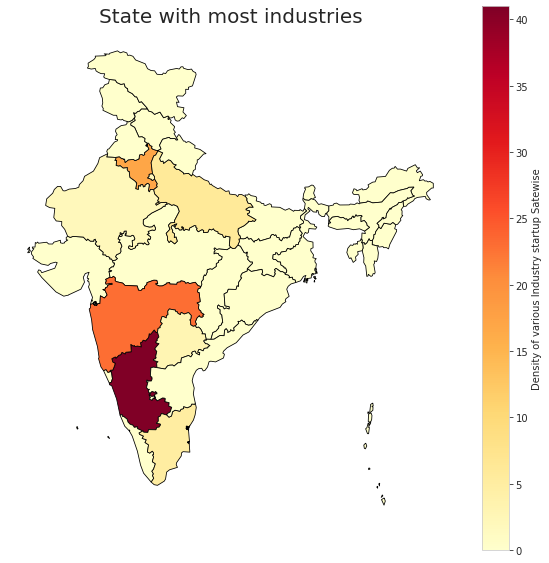

In [ ]:
#Create figure and axes for Matplotlib and set the title
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State with most ', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
merged.plot(column='sum',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Density of various Industry startup Satewise"})

In [ ]:
state_amt_df = df.groupby('States')['Amount in USD'].sum()
state_amt_df = state_amt_df.to_frame()
state_amt_df.reset_index(level=0, inplace=True)
state_amt_df.columns = ['States', 'Count']

In [ ]:
state_amt_df

,States,Count
0,Bihar,4.200000e+07
1,Delhi,3.046763e+09
2,Goa,4.980000e+06
3,Gujarat,1.619808e+08
4,Haryana,4.484424e+09
5,Jammu and Kashmir,0.000000e+00
6,Karnataka,2.293545e+10
7,Kerala,1.000000e+05
8,Madhya Pradesh,2.330665e+06
9,Maharashtra,5.103276e+09


In [ ]:
#Merging the data
merged = map_df.set_index('st_nm').join(state_amt_df.set_index('States'))
merged['Count'] = merged['Count'].replace(np.nan, 0)
merged.head()

,id,geometry,Count
st_nm,,,
Andaman and Nicobar Islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",0.0
Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",0.0
Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",0.0
Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",42000000.0
Chandigarh,None,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",0.0


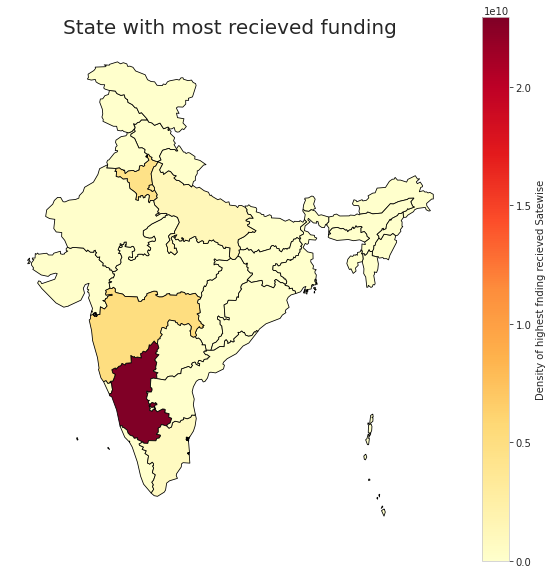

In [ ]:
#Create figure and axes for Matplotlib and set the title
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State with most recieved funding', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
merged.plot(column='Count',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Density of highest fnding recieved Satewise"})

Funding range provided by investors

In [ ]:
df["Amount in USD"]=df["Amount in USD"].replace("undisclosed","")
df["Amount in USD"]=df["Amount in USD"].replace("unknown","")
df["Amount in USD"]=df["Amount in USD"].replace("unknown","")
df["Amount in USD"]=df["Amount in USD"].replace("Undisclosed","")
df["Amount in USD"]=df["Amount in USD"].replace("+","")

In [ ]:
df["Amount in USD"]=pd.to_numeric(df["Amount in USD"])

In [ ]:
df.shape

(3178, 9)

In [ ]:
df.describe()

,Amount in USD
count,2.180000e+03
mean,2.038304e+07
std,1.229900e+08
min,1.600000e+04
25%,5.000000e+05
50%,2.000000e+06
75%,9.525000e+06
max,3.900000e+09


In [ ]:
plt.figure(figsize=(20,15))
px.histogram(df, x="Amount in USD")

<Figure size 1440x1080 with 0 Axes>

In [ ]:
df=df.sort_values(by=["Amount in USD"],ascending=True).reset_index()
df_botfun=df[0:20]
df_botfun[["Startup Name","Amount in USD"]]

,Startup Name,Amount in USD
0,Enabli,16000.0
1,Hostel Dunia,16000.0
2,Play your sport,16000.0
3,Yo Grad,16000.0
4,CBS,16000.0
5,Dealwithus,16600.0
6,Faaya,16600.0
7,Leaf,16600.0
8,CleverSharks,16600.0
9,Chloroplast Foods,16600.0


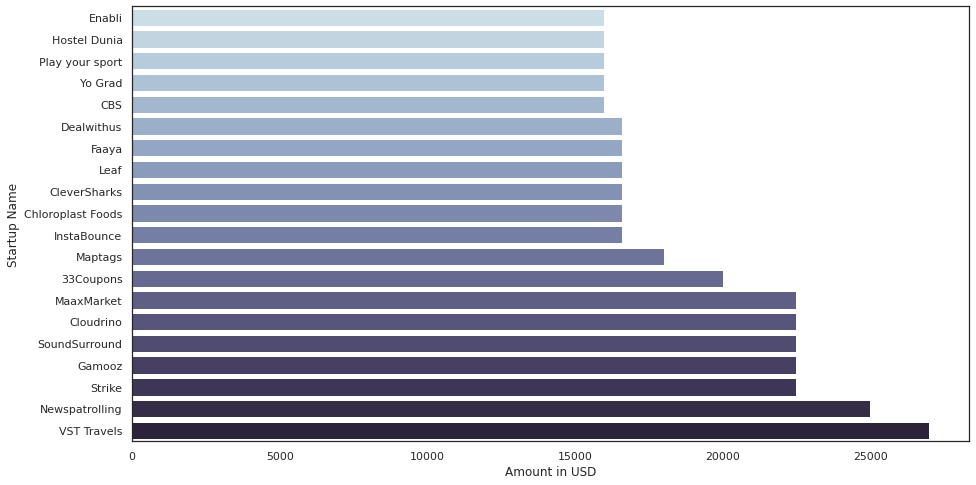

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style="white")
sns.barplot(data=df_botfun,y="Startup Name",x="Amount in USD",palette="ch:s=.25,rot=-.25")

In [ ]:
df.to_csv(r'/content/drive/MyDrive/final_data2.csv')

In [ ]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

x= df['Amount in USD']
hist_data=[x]
group_labels=['distplot']
fig = ff.create_distplot(hist_data,group_labels)
fig.show()